In [1]:
import csv
import numpy as np

f = open('../data/csv/school_2019.csv', 'r', encoding='utf-8')
lines = csv.reader(f)

header = next(lines)

list_data = []
for line in lines :
    list_data.append(line[:])

length = len(list_data)

data = np.zeros((length, 3), dtype='int32')

for i in range(length) :
    for j in range(3) :
        data[i][j] = list_data[i][j+2]

max_index = np.argmax(data, axis=0)
print(max_index)

max_class = list_data[max_index[0]][1]
num_class = list_data[max_index[0]][2]

max_student = list_data[max_index[1]][1]
num_student = list_data[max_index[1]][3]

max_teacher = list_data[max_index[2]][1]
num_teacher = list_data[max_index[2]][4]

print('최대 학급수의 초등학교 : %s, 학급수 : %s개' % (max_class, num_class))
print('최대 학생수의 초등학교 : %s, 학생수 : %s명' % (max_student, num_student))
print('최대 교사수의 초등학교 : %s, 교사수 : %s명' % (max_teacher, num_teacher))

f.close()

[ 138 1999  138]
최대 학급수의 초등학교 : 서울신정초등학교, 학급수 : 75개
최대 학생수의 초등학교 : 탄벌초등학교, 학생수 : 2178명
최대 교사수의 초등학교 : 서울신정초등학교, 교사수 : 91명


{'마재': ['24', '481', '28'], '약사': ['29', '685', '33'], '정평': ['36', '945', '43'], '도평': ['14', '300', '17']}
[[ 24 481  28]
 [ 29 685  33]
 [ 36 945  43]
 [ 14 300  17]]
[[ 24 481   0  28   0]
 [ 29 685   0  33   0]
 [ 36 945   0  43   0]
 [ 14 300   0  17   0]]
[[ 24 481  20  28  17]
 [ 29 685  24  33  21]
 [ 36 945  26  43  22]
 [ 14 300  21  17  18]]


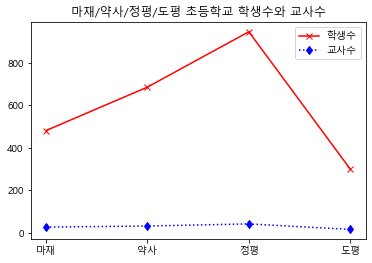

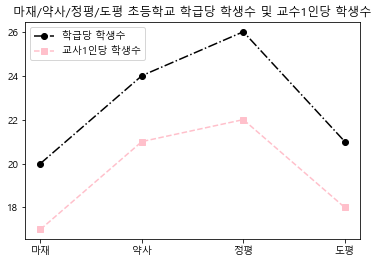

In [2]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='Malgun Gothic')

f = open('../data/csv/school_2019.csv', 'r', encoding='utf-8')
lines = csv.reader(f)

header = next(lines)

schools = {}

for line in lines :
    if ('광주' in line[0]) and ('마재' in line[1]) :
        schools.update({'마재':[line[2], line[3], line[4]]})
    if ('울산' in line[0]) and ('약사' in line[1]) :
        schools.update({'약사':[line[2], line[3], line[4]]})
    if ('용인' in line[0]) and ('정평' in line[1]) :
        schools.update({'정평':[line[2], line[3], line[4]]})
    if ('제주' in line[0]) and ('도평' in line[1]) :
        schools.update({'도평':[line[2], line[3], line[4]]})

print(schools)

data = np.zeros((4, 3), dtype='int32')

school = list(schools.values())

for i in range(len(schools)) :
    for j in range(3) :
        data[i][j] = school[i][j]

print(data)

data = np.insert(data, 2, 0, axis=1)
data = np.insert(data, 4, 0, axis=1)
print(data)

row = data.shape[0]
for i in range(row) :
    data[i][2] = round(data[i][1]/data[i][0])
    data[i][4] = round(data[i][1]/data[i][3])

print(data)

xdata = ['마재', '약사', '정평', '도평']

plt.plot(xdata, data[:, 1], label='학생수', color='red', linestyle='-', marker='x')
plt.plot(xdata, data[:, 3], label='교사수', color='blue', linestyle=':', marker='d')
plt.title('마재/약사/정평/도평 초등학교 학생수와 교사수')
plt.legend(loc='best')
plt.show()

plt.plot(xdata, data[:, 2], label='학급당 학생수', color='black', linestyle='-.', marker='o')
plt.plot(xdata, data[:, 4], label='교사1인당 학생수', color='pink', linestyle='--', marker='s')
plt.title('마재/약사/정평/도평 초등학교 학급당 학생수 및 교수1인당 학생수')
plt.legend(loc='best')
plt.show()

f.close()